# Machine Learning

# <font color=blue>*Introduction*

This project will be an introduction to machine learning.

The code for this project contains the following files, available as a <a href="https://inst.eecs.berkeley.edu/~cs188/fa18/assets/files/machinelearning.zip">zip archive</a>.

**Note**: In this project you only need to submit the token generated by submission_autograder.py. See Submission for details.
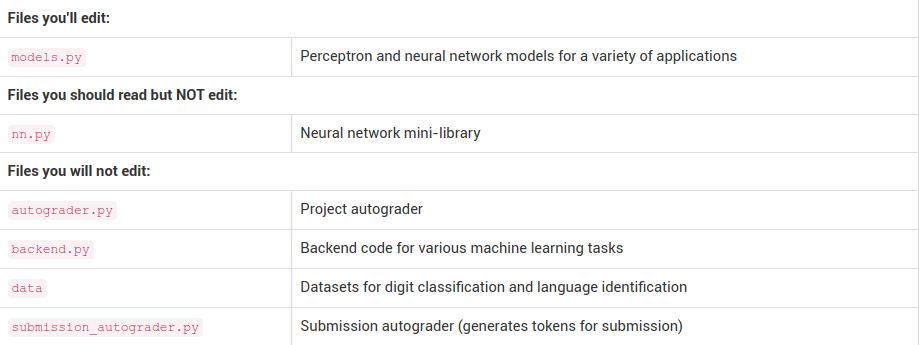

**Files to Edit and Submit**: You will fill in portions of models.py during the assignment. Please do not change the other files in this distribution.

**Note**: You only need to submit `machinelearning.token`, generated by running `submission_autograder.py`. It contains the evaluation results from your local autograder, and a copy of all your code. You do not need to submit any other files.



# <font color=blue>*Installation*

For this project, you will need to install the following two libraries:
- `numpy`, which provides support for large multi-dimensional arrays - <a href="https://docs.scipy.org/doc/numpy-1.13.0/user/install.html">installation instructions</a>
- `matplotlib`, a 2D plotting library - <a href="https://matplotlib.org/users/installing.html">installation instructions</a>

You will not be using these libraries directly, but they are required in order to run the provided code and autograder.

To test that everything has been installed, run:


If `numpy` and `matplotlib` are installed correctly, you should see a window pop up where a line segment spins in a circle:
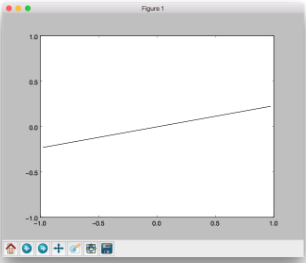

# <font color=blue>*Provided Code Part 1* 

For this project, you have been provided with a neural network mini-library (`nn.py`) and a collection of datasets (`backend.py`).

The library in `nn.py` defines a collection of node objects. Each node represents a real number or a matrix of real numbers. Operations on Node objects are optimized to work faster than using Python's built-in types (such as lists).

Here are a few of the provided node types:
- `nn.Constant` represents a matrix (2D array) of floating point numbers. It is typically used to represent input features or target outputs/labels. Instances of this type will be provided to you by other functions in the API; you will not need to construct them directly
- `nn.Parameter` represents a trainable parameter of a perceptron or neural network
- `nn.DotProduct` computes a dot product between its inputs

Additional provided functions:
- `nn.as_scalar` can extract a Python floating-point number from a node.

When training a perceptron or neural network, you will be passed a dataset object. You can retrieve batches of training examples by calling `dataset.iterate_once(batch_size)`:
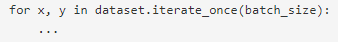

For example, let's extract a batch of size 1 (i.e. a single training example) from the perceptron training data:
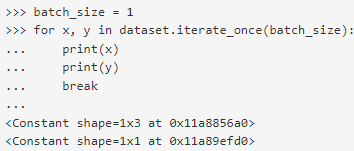

The input features `x` and the correct label `y` are provided in the form of `nn.Constant` nodes. The shape of `x` will be `batch_size`X`num_features`, and the shape of `y` is `batch_size`X`num_outputs`. Here is an example of computing a dot product of `x` with itself, first as a node and then as a Python number.
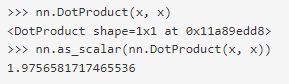

# <font color=blue>*Perceptron*

Before starting this part, be sure you have `numpy` and `matplotlib` installed!

In this part, you will implement a binary perceptron. Your task will be to complete the implementation of the `PerceptronModel` class in `models.py`.

For the perceptron, the output labels will be either 1 or −1, meaning that data points `(x, y)` from the dataset will have `y` be a `nn.Constant` node that contains either 1 or −1 as its entries.

We have already initialized the perceptron weights `self.w` to be a `1`X`dimensions` parameter node. The provided code will include a bias feature inside `x` when needed, so you will not need a separate parameter for the bias.

Your tasks are to:
- Implement the `run(self, x)` method. This should compute the dot product of the stored weight vector and the given input, returning an `nn.DotProduct` object.
- Implement `get_prediction(self, x)`, which should return 1 if the dot product is non-negative or −1 otherwise. You should use `nn.as_scalar` to convert a scalar `Node` into a Python floating-point number.
- Write the `train(self)` method. This should repeatedly loop over the data set and make updates on examples that are misclassified. Use the `update` method of the `nn.Parameter` class to update the weights. When an entire pass over the data set is completed without making any mistakes, 100% training accuracy has been achieved, and training can terminate.

In this project, the only way to change the value of a parameter is by calling `parameter.update(direction, multiplier)`, which will perform the update to the weights:


The `direction` argument is a `Node` with the same shape as the parameter, and the `multiplier` argument is a Python scalar.

To test your implementation, run the autograder:


**Note**: the autograder should take at most 20 seconds or so to run for a correct implementation. If the autograder is taking forever to run, your code probably has a bug.

# <font color=blue>*Neural Network Tips*

In the remaining parts of the project, you will implement the following models:
- Q2: Regression
- Q3: Handwritten Digit Classification
- Q4: Language Identification

### <font color=red>*Building Neural Networks*
Throughout the applications portion of the project, you'll use the framework provided in `nn.py` to create neural networks to solve a variety of machine learning problems. A simple neural network has layers, where each layer performs a linear operation (just like perceptron). Layers are separated by a non-linearity, which allows the network to approximate general functions. We'll use the ReLU operation for our non-linearity, defined as `relu(x) = max(x,0)`. For example, a simple two-layer neural network for mapping an input row vector x to an output vector f(x) would be given by the function:

    
where we have parameter matrices W<sub>1</sub> and W<sub>2</sub> and parameter vectors b<sub>1</sub> and b<sub>2</sub> to learn during gradient descent. W<sub>1</sub> will be an `i × h` matrix, where `i` is the dimension of our input vectors `x`, and `h` is the hidden layer size. b<sub>1</sub> will be a size `h` vector. We are free to choose any value we want for the hidden size (we will just need to make sure the dimensions of the other matrices and vectors agree so that we can perform the operations). Using a larger hidden size will usually make the network more powerful (able to fit more training data), but can make the network harder to train (since it adds more parameters to all the matrices and vectors we need to learn), or can lead to overfitting on the training data. 

We can also create deeper networks by adding more layers, for example a three-layer net:

    
### <font color=red>*Note on Batching*
For efficiency, you will be required to process whole batches of data at once rather than a single example at a time. This means that instead of a single input row vector `x` with size `i`, you will be presented with a batch of `b` inputs represented as a `b × i` matrix `X`. We provide an example for linear regression to demonstrate how a linear layer can be implemented in the batched setting.
        
### <font color=red>*Note on Randomness*
The parameters of your neural network will be randomly initialized, and data in some tasks will be presented in shuffled order. Due to this randomness, it's possible that you will still occasionally fail some tasks even with a strong architecture -- this is the problem of local optima! This should happen very rarely, though -- if when testing your code you fail the autograder twice in a row for a question, you should explore other architectures.
    
### <font color=red>*Practical Tips*
Designing neural nets can take some trial and error. Here are some tips to help you along the way:
- **Be systematic**. Keep a log of every architecture you've tried, what the hyperparameters (layer sizes, learning rate, etc.) were, and what the resulting performance was. As you try more things, you can start seeing patterns about which parameters matter. If you find a bug in your code, be sure to cross out past results that are invalid due to the bug.
- **Start with a shallow network (just two layers, i.e. one non-linearity)**. Deeper networks have exponentially more hyperparameter combinations, and getting even a single one wrong can ruin your performance. Use the small network to find a good learning rate and layer size; afterwards you can consider adding more layers of similar size.
- **If your learning rate is wrong, none of your other hyperparameter choices matter**. You can take a state-of-the-art model from a research paper, and change the learning rate such that it performs no better than random.
- **Smaller batches require lower learning rates**. When experimenting with different batch sizes, be aware that the best learning rate may be different depending on the batch size.
- **Making the network too wide generally doesn't hurt accuracy too much**. If you keep making the network wider accuracy will gradually decline, but computation time will increase quadratically in the layer size -- you're likely to give up due to excessive slowness long before the accuracy falls too much. The full autograder for all parts of the project takes 2-12 minutes to run with staff solutions; if your code is taking much longer you should check it for efficiency.
- If your model is returning Infinity or NaN, your learning rate is probably too high for your current architecture.
- Recommended values for your hyperparameters:
    - Hidden layer sizes: between 10 and 400
    - Batch size: between 1 and the size of the dataset. For Q2 and Q3, we require that total size of the dataset be evenly divisible by the batch size.
    - Learning rate: between 0.001 and 1.0
    - Number of hidden layers: between 1 and 3

# <font color=blue>*Provided Code Part 2*

Here is a full list of nodes available in `nn.py`. You will make use of these in the remaining parts of the assignment:
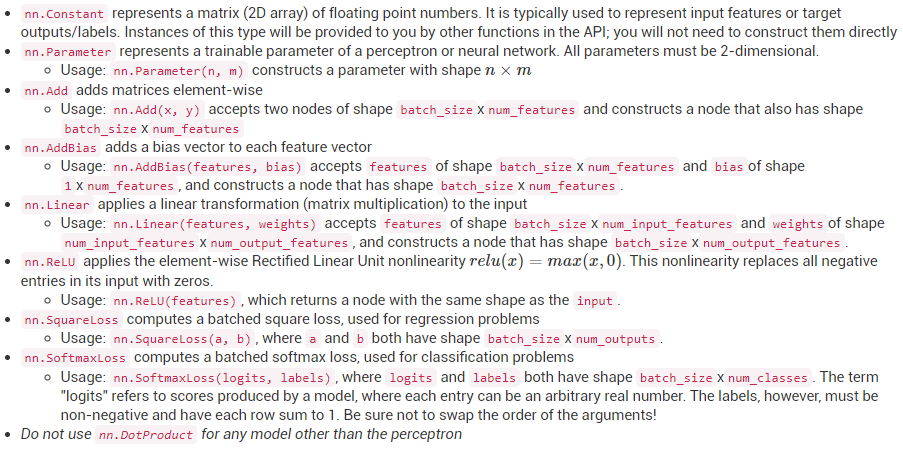

The following methods are available in `nn.py`:
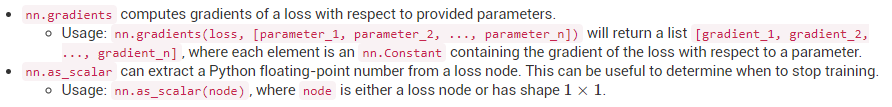

The datasets provided also have two additional methods:
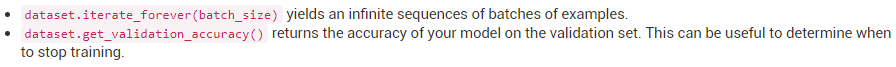

# <font color=blue>*Example: Linear Regression*

As an example of how the neural network framework works, let's fit a line to a set of data points. We'll start four points of training data constructed using the function y = 7x<sub>0</sub> + 8x<sub>1</sub> + 3. In batched form, our data is:
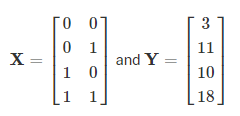

Suppose the data is provided to us in the form of `nn.Constant` nodes:
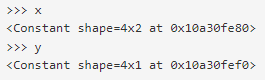

Let's construct and train a model of the form f(x) = x<sub>0</sub> ⋅ m<sub>0</sub> + x<sub>1</sub> ⋅ m<sub>1</sub> + b. If done correctly, we should be able to learn than m<sub>0</sub> = 7, m<sub>1</sub> = 8, and b=3.

First, we create our trainable parameters. In matrix form, these are:
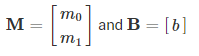

Which corresponds to the following code:
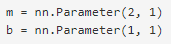

Printing them gives:
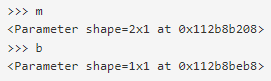

Next, we compute our model's predictions for y:
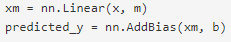

Our goal is to have the predicted y-values match the provided data. In linear regression we do this by minimizing the square loss:


We construct a loss node:


In our framework, we provide a method that will return the gradients of the loss with respect to the parameters:


Printing the nodes used gives:
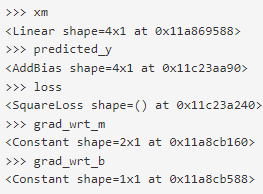

We can then use the update method to `update` our parameters. Here is an update for `m`, assuming we have already initialized a `multiplier` variable based on a suitable learning rate of our choosing:


If we also include an update for `b` and add a loop to repeatedly perform gradient updates, we will have the full training procedure for linear regression.

# <font color=blue>*Non-linear Regression*

For this question, you will train a neural network to approximate sin(x) over `[−2π,2π]`.

You will need to complete the implementation of the `RegressionModel` class in `models.py`. For this problem, a relatively simple architecture should suffice (see Neural Network Tips for architecture tips.) Use `nn.SquareLoss` as your loss.

Your tasks are to:
- Implement `RegressionModel.run` to return a `batch_size x 1` node that represents your model's prediction.
- Implement `RegressionModel.get_loss` to return a loss for given inputs and target outputs.
- Implement `RegressionModel.train`, which should train your model using gradient-based updates.

There is only a single dataset split for this task, i.e. there is only training data and no validation data or test set. Your implementation will receive full points if it gets a loss of 0.02 or better, averaged across all examples in the dataset. You may use the training loss to determine when to stop training (use `nn.as_scala`r to convert a loss node to a Python number).


In [11]:
import numpy as np

arr = np.array([1.5, 2.5, 3.5])
  
arr = arr.astype(int)